In [128]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

The data set had the current time missing for the first ~10 rows. These have been replaced with 00:00:00.

In [129]:
data_path = os.path.join(os.getcwd(),'results.txt')
names=['execution_time', 'no_of_mappers', 'no_of_Reducers', 'combiner_used', 'input_file_factor', 'current_time']
data_set_raw = pd.read_csv(data_path, delimiter = '|', names = names)
data_set_raw.head(5)

,execution_time,no_of_mappers,no_of_Reducers,combiner_used,input_file_factor,current_time
0,Script Execution Time: 142.88 seconds,Mappers: 1,Reducers: 1,Combiner Used: No,Input File: 100x,NaN
1,Script Execution Time: 119.57 seconds,Mappers: 1,Reducers: 2,Combiner Used: No,Input File: 100x,NaN
2,Script Execution Time: 110.75 seconds,Mappers: 1,Reducers: 3,Combiner Used: No,Input File: 100x,NaN
3,Script Execution Time: 111.18 seconds,Mappers: 1,Reducers: 4,Combiner Used: No,Input File: 100x,NaN
4,Script Execution Time: 105.59 seconds,Mappers: 1,Reducers: 5,Combiner Used: No,Input File: 100x,NaN


In [130]:
data_set_raw

,execution_time,no_of_mappers,no_of_Reducers,combiner_used,input_file_factor,current_time
0,Script Execution Time: 142.88 seconds,Mappers: 1,Reducers: 1,Combiner Used: No,Input File: 100x,NaN
1,Script Execution Time: 119.57 seconds,Mappers: 1,Reducers: 2,Combiner Used: No,Input File: 100x,NaN
2,Script Execution Time: 110.75 seconds,Mappers: 1,Reducers: 3,Combiner Used: No,Input File: 100x,NaN
3,Script Execution Time: 111.18 seconds,Mappers: 1,Reducers: 4,Combiner Used: No,Input File: 100x,NaN
4,Script Execution Time: 105.59 seconds,Mappers: 1,Reducers: 5,Combiner Used: No,Input File: 100x,NaN
...,...,...,...,...,...,...
795,Script Execution Time: 39.33 seconds,Mappers: 20,Reducers: 16,Combiner Used: Yes,Input File: 100x,Current Time: 04:45:26
796,Script Execution Time: 41.42 seconds,Mappers: 20,Reducers: 17,Combiner Used: Yes,Input File: 100x,Current Time: 04:46:10
797,Script Execution Time: 41.41 seconds,Mappers: 20,Reducers: 18,Combiner Used: Yes,Input File: 100x,Current Time: 04:46:53
798,Script Execution Time: 41.57 seconds,Mappers: 20,Reducers: 19,Combiner Used: Yes,Input File: 100x,Current Time: 04:47:37


Currently each entry has the column label. These need removed and added to the dataframe columns. Define method to clean the dataset.

In [131]:
def clean_data(data_set_raw):
    data_set = data_set_raw.copy() 
    data_set[names[0]] = pd.to_numeric(data_set[names[0]]
                                            .str.split(':')
                                            .str.get(1)
                                            .str.split(' ')
                                            .str.get(1))

    data_set[names[1]] = pd.to_numeric(data_set[names[1]]
                                            .str.split(':')
                                            .str.get(1))

    data_set[names[2]]= pd.to_numeric(data_set[names[2]]
                                            .str.split(':')
                                            .str.get(1))

    data_set[names[3]] = data_set[names[3]].str.split(':').str.get(1).str.strip()
    d = {'Yes': True, 'No': False}
    data_set[names[3]] = data_set['combiner_used'].map(d)

    data_set[names[4]]= pd.to_numeric(data_set[names[4]]
                                            .str.split(':')
                                            .str.get(1)
                                            .str.strip().str.rstrip('x'))

    data_set = data_set.drop(names[5], axis=1)
    return data_set

In [132]:
data_set = clean_data(data_set_raw)
data_set.sample(7, random_state=10)

,execution_time,no_of_mappers,no_of_Reducers,combiner_used,input_file_factor
27,68.52,2,8,False,100
334,39.36,17,15,False,100
730,36.39,17,11,True,100
392,39.19,20,13,False,100
495,44.37,5,16,True,100
318,41.25,16,19,False,100
190,41.53,10,11,False,100


Display info about columns.

In [133]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   execution_time     800 non-null    float64
 1   no_of_mappers      800 non-null    int64  
 2   no_of_Reducers     800 non-null    int64  
 3   combiner_used      800 non-null    bool   
 4   input_file_factor  800 non-null    int64  
dtypes: bool(1), float64(1), int64(3)
memory usage: 25.9 KB


Next look at some summary statistics using describe.

In [134]:
data_set.describe(include='all')

,execution_time,no_of_mappers,no_of_Reducers,combiner_used,input_file_factor
count,800.000000,800.000000,800.000000,800,800.0
unique,NaN,NaN,NaN,2,NaN
top,NaN,NaN,NaN,True,NaN
freq,NaN,NaN,NaN,400,NaN
mean,47.328462,10.500000,10.500000,NaN,100.0
std,16.042591,5.769889,5.769889,NaN,0.0
min,31.130000,1.000000,1.000000,NaN,100.0
25%,38.417500,5.750000,5.750000,NaN,100.0
50%,41.475000,10.500000,10.500000,NaN,100.0
75%,49.450000,15.250000,15.250000,NaN,100.0


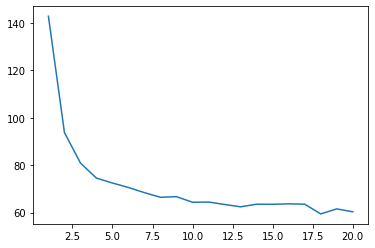

In [135]:
# Plots execution time vs number of mappers for fixed reducers and combiner

fixed_number_of_reducers = 1
use_combiners = False

cond = (data_set[names[2]] == fixed_number_of_reducers) & (data_set[names[3]] == use_combiners)
filt = data_set[cond]
plt.plot(filt[names[1]], filt[names[0]])


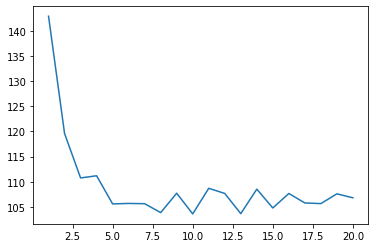

In [136]:
# Plots execution time vs number of reducers for fixed mappers and combiner

fixed_number_of_mappers = 1
use_combiners = False

cond = (data_set[names[1]] == fixed_number_of_mappers) & (data_set[names[3]] == use_combiners)
filt = data_set[cond]
plt.plot(filt[names[2]], filt[names[0]])

(array([ 48., 170., 210., 116.,  64.,  41.,  28.,  15.,  25.,  12.,  16.,
         11.,   0.,   3.,   0.,   0.,   3.,  11.,   4.,   7.,  11.,   3.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 31.13 ,  34.855,  38.58 ,  42.305,  46.03 ,  49.755,  53.48 ,
         57.205,  60.93 ,  64.655,  68.38 ,  72.105,  75.83 ,  79.555,
         83.28 ,  87.005,  90.73 ,  94.455,  98.18 , 101.905, 105.63 ,
        109.355, 113.08 , 116.805, 120.53 , 124.255, 127.98 , 131.705,
        135.43 , 139.155, 142.88 ]),
 <a list of 30 Patch objects>)

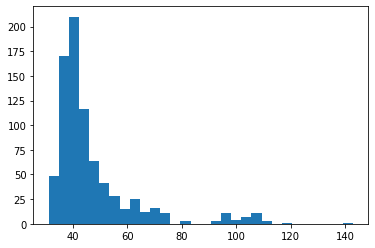

In [137]:
# Histogram of distribution of execution times
plt.hist(data_set[names[0]], bins=30)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


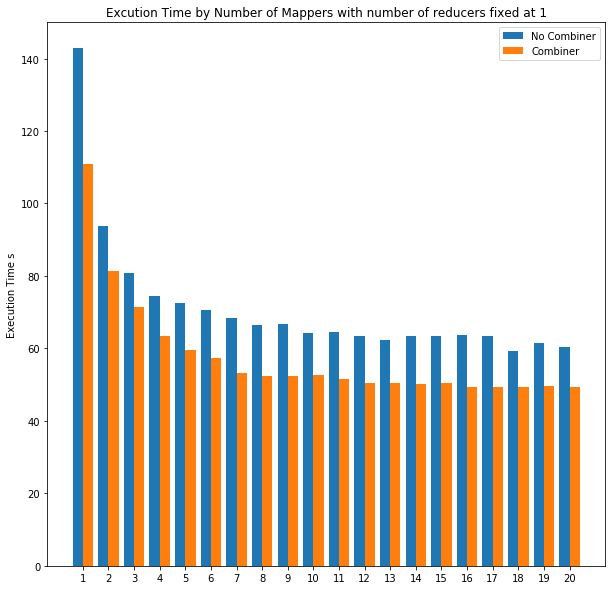

In [138]:
# Plots execution time vs number of mappers for fixed reducers and combiner

fixed_number_of_reducers = 1

cond_no_combiners = (data_set[names[2]] == fixed_number_of_reducers) & (data_set[names[3]] == False)
cond_combiners = (data_set[names[2]] == fixed_number_of_reducers) & (data_set[names[3]] == True)

labels = np.arange(1,21)
print(labels)
no_combiners = data_set.loc[cond_no_combiners, names[0]]
combiners = data_set.loc[cond_combiners, names[0]]

width = 0.40

fig, ax = plt.subplots(figsize=(10,10))
rects1 = ax.bar(labels - width/2, no_combiners, width, label='No Combiner')
rects2 = ax.bar(labels + width/2, combiners, width, label='Combiner')


ax.set_ylabel('Execution Time s')
ax.set_title('Excution Time by Number of Mappers with number of reducers fixed at ' + str(fixed_number_of_reducers))
ax.set_xticks(labels)
ax.set_xticklabels(labels)
ax.legend()


In [139]:
data_processed = data_set

# Principal component analysis (PCA)

Centre the data matrix if required (SKlearn implementation does this automatically)

In [140]:
#mu = np.mean(data_processed, axis=0)
#data_processed_centered = data_processed - mu

data_processed_centered = data_processed

Generate a set of score plots, which variables should be used here?

In [141]:
# Your code goes here
from sklearn.decomposition import PCA
pca = PCA().fit(data_processed_centered)

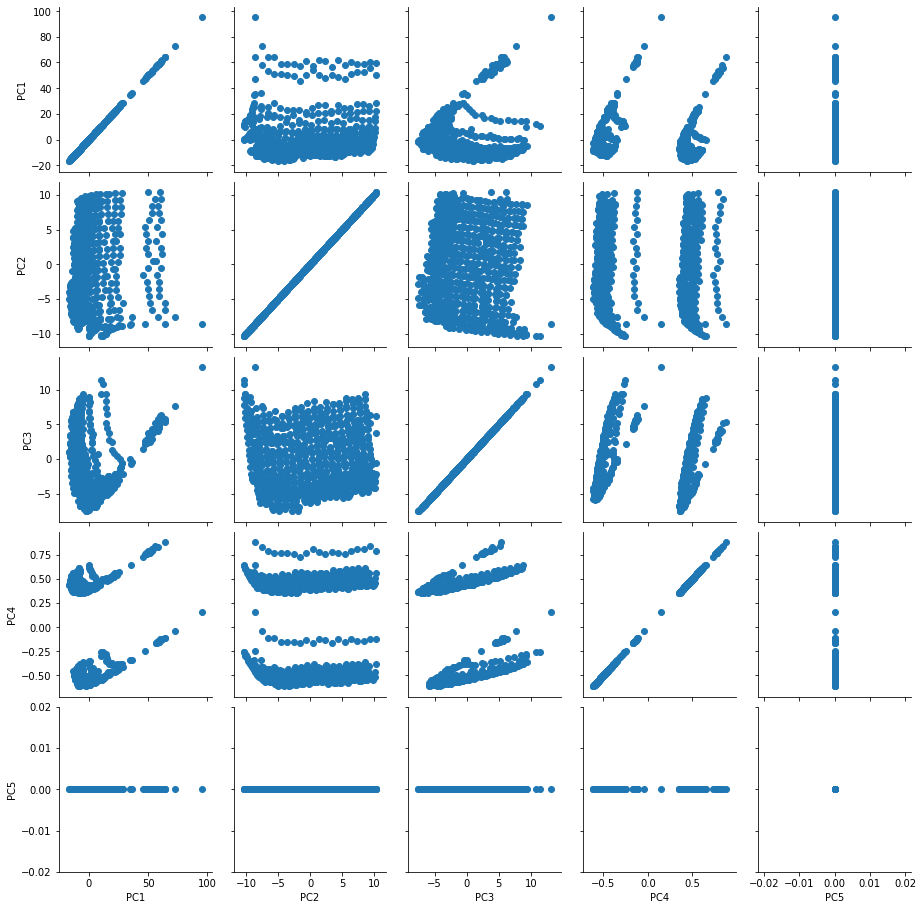

In [142]:
pc_scores = pca.transform(data_processed_centered)
pc_scores = pd.DataFrame(pc_scores, columns=['PC1', 'PC2','PC3','PC4','PC5'])

data_combined = pd.concat([pc_scores, data_processed], axis=1)
g = sns.PairGrid(data_combined, vars=["PC1", "PC2","PC3", "PC4", "PC5"])
g.map(plt.scatter);

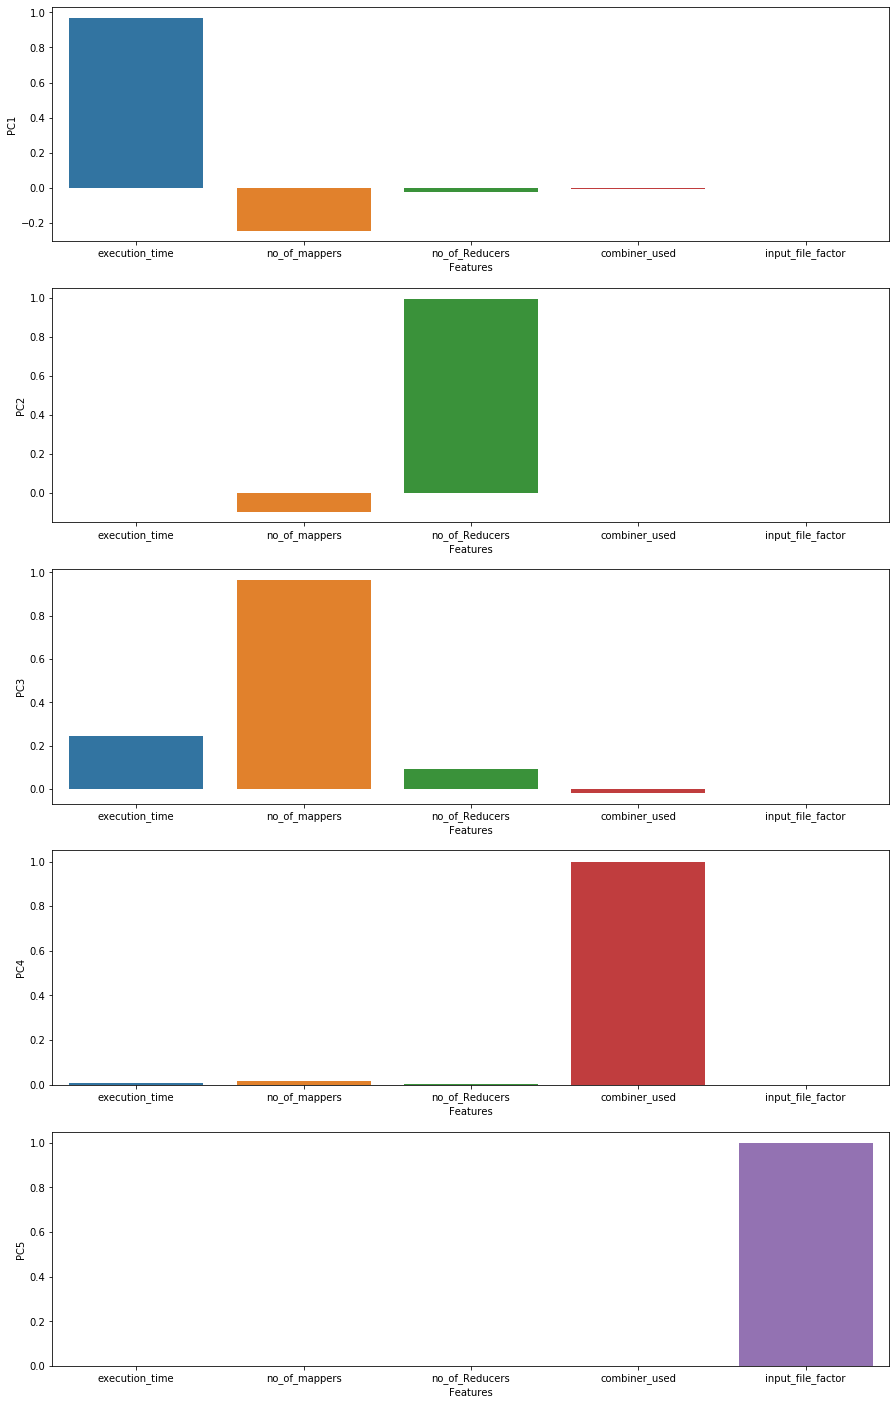

In [143]:
pc_components = pca.components_.T
pc_components = pd.DataFrame(pc_components, columns=['PC1', 'PC2','PC3','PC4','PC5'])

vars_df = pd.DataFrame(names[:5], columns=['Features'])

pc_data = pd.concat([pc_components, vars_df],axis=1)

f, axes = plt.subplots(5, 1, figsize=(15,25))
sns.barplot(x="Features", y="PC1", data=pc_data, ax=axes[0])
sns.barplot(x="Features", y="PC2", data=pc_data, ax=axes[1])
sns.barplot(x="Features", y="PC3", data=pc_data, ax=axes[2])
sns.barplot(x="Features", y="PC4", data=pc_data, ax=axes[3])
sns.barplot(x="Features", y="PC5", data=pc_data, ax=axes[4])

324.1982563315082


Text(0, 0.5, 'Explained Variance')

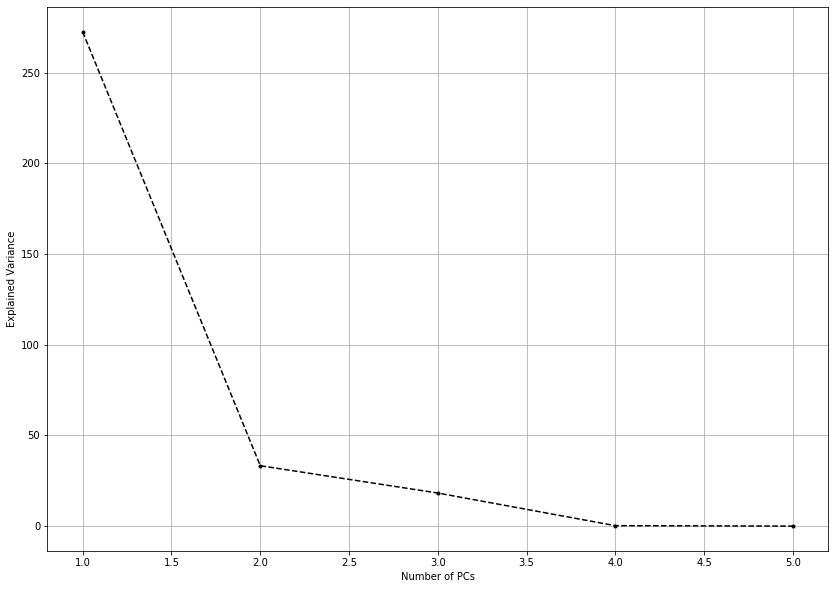

In [144]:
pc_explained = pca.explained_variance_
print(np.sum(pc_explained))
pc_no = np.arange(1,6)

plt.figure(figsize=(14,10))
plt.plot(pc_no, pc_explained, '.--k')
plt.grid()
plt.xlabel('Number of PCs')
plt.ylabel('Explained Variance')


# Modelling

## Data Splits and standardisation

In [145]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

random_state = 42

X = data_processed[[names[0], names[1], names[2], names[4]]]
y = data_processed[[names[3]]]

X, X_test, y, y_test = train_test_split(X, y, 
                                                  test_size=0.2, random_state=random_state)

X_train, X_val, y_train, y_val = train_test_split(X, y, 
                                                  test_size=0.33, random_state=random_state)


sc = StandardScaler().fit(X_train)
X_train_sc = sc.transform(X_train)
X_val_sc = sc.transform(X_val)
X_test_sc = sc.transform(X_test)

## Classification of Whether a Combiner is Used
Determine if we can classify the results based on the number of combiners used 

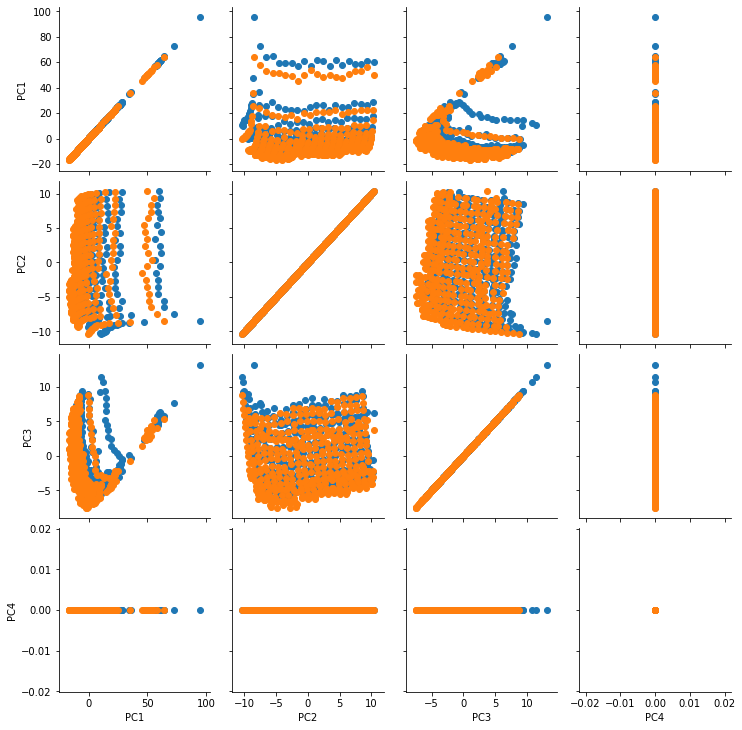

In [146]:
# Only use the variables which are inputs to the model in PCA
data_processed_centered = data_processed[[names[0], names[1], names[2], names[4]]]

# Your code goes here
from sklearn.decomposition import PCA
pca = PCA().fit(data_processed_centered)
pc_scores = pca.transform(data_processed_centered)
pc_scores = pd.DataFrame(pc_scores, columns=['PC1', 'PC2','PC3','PC4'])
#print(pc_scores)
#print(pca.components_.T)

data_combined = pd.concat([pc_scores, data_processed], axis=1)
g = sns.PairGrid(data_combined, vars=["PC1", "PC2","PC3", "PC4"], hue="combiner_used")
g.map(plt.scatter);

## Baseline Classifier (Random Label)

In [147]:
from sklearn.metrics import accuracy_score

np.random.seed(42)

N = y_val.shape

y_true = np.where(y_train==True)
p = y_true[0].shape[0]/y_train.shape[0]
print(p)

y_rand = np.random.choice(a=[False, True], size=N, p=[1-p, p])

# By using the predict() method and accuracy_score metric
rand_prediction = y_rand
gnb_accuracy = accuracy_score(y_val, y_rand) # The accuracy_score() function takes as inputs
                                                 # the true labels and the predicted ones


# Print results
print("Baseline classification accuracy on validation set (by using the accuracy_score() function): {:.3f}"
      .format(gnb_accuracy))


0.4883177570093458
Baseline classification accuracy on validation set (by using the accuracy_score() function): 0.481


## Gaussian Naive Bayes Classifier

In [148]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

#Fit the gaussian classifier
gnb = GaussianNB().fit(X_train_sc,y_train.values.ravel())


# By using the predict() method and accuracy_score metric
gnb_prediction = gnb.predict(X_val_sc)
gnb_accuracy = accuracy_score(y_val, gnb_prediction) # The accuracy_score() function takes as inputs
                                                 # the true labels and the predicted ones

# By using the score() method
gnb_accuracy_alt = gnb.score(X_val_sc, y_val) # The score() method takes as inputs 
                                              # the test input features and the associated (true) labels

# Print results
print("GNB classification accuracy on validation set (by using the accuracy_score() function): {:.3f}"
      .format(gnb_accuracy))
print("GNB classification accuracy on validation set (by using the model's score() method): {:.3f}"
      .format(gnb_accuracy_alt))

GNB classification accuracy on validation set (by using the accuracy_score() function): 0.566
GNB classification accuracy on validation set (by using the model's score() method): 0.566


### Using dataset after dimensionality reduction

3 PCs

In [149]:
random_state = 42

X = pc_scores[['PC1', 'PC2', 'PC3']]
y = data_processed[[names[3]]]

X, X_test, y, y_test = train_test_split(X, y, 
                                                  test_size=0.2, random_state=random_state)

X_train, X_val, y_train, y_val = train_test_split(X, y, 
                                                  test_size=0.33, random_state=random_state)


sc = StandardScaler().fit(X_train)
X_train_sc = sc.transform(X_train)
X_val_sc = sc.transform(X_val)
X_test_sc = sc.transform(X_test)

#Fit the gaussian classifier
gnb = GaussianNB().fit(X_train_sc,y_train.values.ravel())


# By using the predict() method and accuracy_score metric
gnb_prediction = gnb.predict(X_val_sc)
gnb_accuracy = accuracy_score(y_val, gnb_prediction) # The accuracy_score() function takes as inputs
                                                 # the true labels and the predicted ones

# By using the score() method
gnb_accuracy_alt = gnb.score(X_val_sc, y_val) # The score() method takes as inputs 
                                              # the test input features and the associated (true) labels

# Print results
print("GNB classification accuracy on validation set (by using the accuracy_score() function): {:.3f}"
      .format(gnb_accuracy))
print("GNB classification accuracy on validation set (by using the model's score() method): {:.3f}"
      .format(gnb_accuracy_alt))

GNB classification accuracy on validation set (by using the accuracy_score() function): 0.547
GNB classification accuracy on validation set (by using the model's score() method): 0.547


2 PCs

In [150]:
random_state = 42

X = pc_scores[['PC1', 'PC2']]
y = data_processed[[names[3]]]

X, X_test, y, y_test = train_test_split(X, y, 
                                                  test_size=0.2, random_state=random_state)

X_train, X_val, y_train, y_val = train_test_split(X, y, 
                                                  test_size=0.33, random_state=random_state)


sc = StandardScaler().fit(X_train)
X_train_sc = sc.transform(X_train)
X_val_sc = sc.transform(X_val)
X_test_sc = sc.transform(X_test)

#Fit the gaussian classifier
gnb = GaussianNB().fit(X_train_sc,y_train.values.ravel())


# By using the predict() method and accuracy_score metric
gnb_prediction = gnb.predict(X_val_sc)
gnb_accuracy = accuracy_score(y_val, gnb_prediction) # The accuracy_score() function takes as inputs
                                                 # the true labels and the predicted ones

# By using the score() method
gnb_accuracy_alt = gnb.score(X_val_sc, y_val) # The score() method takes as inputs 
                                              # the test input features and the associated (true) labels

# Print results
print("GNB classification accuracy on validation set (by using the accuracy_score() function): {:.3f}"
      .format(gnb_accuracy))
print("GNB classification accuracy on validation set (by using the model's score() method): {:.3f}"
      .format(gnb_accuracy_alt))

GNB classification accuracy on validation set (by using the accuracy_score() function): 0.547
GNB classification accuracy on validation set (by using the model's score() method): 0.547


## Logistic Regression

In [151]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#Fit the gaussian classifier
lr = LogisticRegression().fit(X_train_sc,y_train.values.ravel())


# By using the predict() method and accuracy_score metric
lr_prediction = lr.predict(X_val_sc)
lr_accuracy = accuracy_score(y_val, lr_prediction) # The accuracy_score() function takes as inputs
                                                 # the true labels and the predicted ones

# By using the score() method
lr_accuracy_alt = lr.score(X_val_sc, y_val) # The score() method takes as inputs 
                                              # the test input features and the associated (true) labels

# Print results
print("Logisitic regression classification accuracy on validation set (by using the accuracy_score() function): {:.3f}"
      .format(lr_accuracy))
print("Logisitic regression classification accuracy on validation set (by using the model's score() method): {:.3f}"
      .format(lr_accuracy_alt))

Logisitic regression classification accuracy on validation set (by using the accuracy_score() function): 0.566
Logisitic regression classification accuracy on validation set (by using the model's score() method): 0.566


## Support Vector Machine (SVM)

### Linear

In [152]:
from sklearn import svm
from sklearn.metrics import accuracy_score

#Fit the gaussian classifier

svm_fit = svm.SVC(kernel='linear').fit(X_train_sc,y_train.values.ravel())


# By using the predict() method and accuracy_score metric
svm_prediction = svm_fit.predict(X_val_sc)
svm_accuracy = accuracy_score(y_val, svm_prediction) # The accuracy_score() function takes as inputs
                                                 # the true labels and the predicted ones

# Print results
print("SVM linear classification accuracy on validation set (by using the accuracy_score() function): {:.3f}"
      .format(svm_accuracy))

SVM linear classification accuracy on validation set (by using the accuracy_score() function): 0.524


### Polynomial

In [153]:
from sklearn import svm
from sklearn.metrics import accuracy_score

#Fit the gaussian classifier
max_accuracy = 0
max_order = -1
for degree in range(10):
    svm_fit = svm.SVC(kernel='poly', degree=degree).fit(X_train_sc, y_train.values.ravel())

    # By using the predict() method and accuracy_score metric
    svm_prediction = svm_fit.predict(X_val_sc)
    svm_accuracy = accuracy_score(y_val, svm_prediction) # The accuracy_score() function takes as inputs
                                                     # the true labels and the predicted ones
    if svm_accuracy > max_accuracy:
        max_order = degree
           
svm_fit = svm.SVC(kernel='poly', degree=max_order).fit(X_train_sc, y_train.values.ravel())

svm_accuracy = accuracy_score(y_val, svm_prediction) # The accuracy_score() function takes as inputs
                                                     # the true labels and the predicted ones

    
# Print results
print("SVM polynomial classification accuracy on validation set = : {:.3f}"
      .format(svm_accuracy))

SVM polynomial classification accuracy on validation set = : 0.571


### RBF

In [154]:
from sklearn import svm
from sklearn.metrics import accuracy_score

#Fit the gaussian classifier

svm_fit = svm.SVC(kernel='rbf').fit(X_train_sc,y_train.values.ravel())


# By using the predict() method and accuracy_score metric
svm_prediction = svm_fit.predict(X_val_sc)
svm_accuracy = accuracy_score(y_val, svm_prediction) # The accuracy_score() function takes as inputs
                                                 # the true labels and the predicted ones

# Print results
print("SVM RBF classification accuracy on validation set: {:.3f}"
      .format(svm_accuracy))

SVM RBF classification accuracy on validation set: 0.632


### Sigmoid

In [155]:
from sklearn import svm
from sklearn.metrics import accuracy_score

#Fit the gaussian classifier

svm_fit = svm.SVC(kernel='sigmoid').fit(X_train_sc,y_train.values.ravel())


# By using the predict() method and accuracy_score metric
svm_prediction = svm_fit.predict(X_val_sc)
svm_accuracy = accuracy_score(y_val, svm_prediction) # The accuracy_score() function takes as inputs
                                                 # the true labels and the predicted ones

# Print results
print("SVM sigmoid classification accuracy on validation set: {:.3f}"
      .format(svm_accuracy))

SVM sigmoid classification accuracy on validation set: 0.500


## Regression to Predict Execution Time
Use features used to generate the dataset to predict the execution time

In [156]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

random_state = 42

X = data_processed[[names[1], names[2], names[3], names[4]]]
#X.combiner_used = X.combiner_used.astype(int)
y = data_processed[[names[0]]]

X, X_test, y, y_test = train_test_split(X, y, 
                                                  test_size=0.2, random_state=random_state)

X_train, X_val, y_train, y_val = train_test_split(X, y, 
                                                  test_size=0.33, random_state=random_state)


sc = StandardScaler().fit(X_train)
X_train_sc = sc.transform(X_train)
X_val_sc = sc.transform(X_val)
X_test_sc = sc.transform(X_test)

## Linear Regression

Helper functions to generate data using basis functions

In [ ]:
def RBF(data, c, h):
    if data.ndim == 1:
        data = data.reshape((-1, 1))
        
    if data.shape[0] == 1 or data.shape[1] == 1:
        data = data.reshape((-1, 1))
        c = c.reshape((-1, 1))
        return np.exp(-((data - c).T @ (data - c)) / (h**2))
    else:
        print('make sure your data is of the correct dims')
        
        
def add_auto_RBF(data, h=100, n=1000,
        type='uniform', append=False):

    design_matrix_framework = []
    D = data.shape[1]
    input_space_max = np.max(data, axis=0)
    input_space_min = np.min(data, axis=0)
    input_space_inc = (input_space_max-input_space_min)/n

    if type == 'random':
        None
    elif type == 'uniform':
        input_space = np.zeros((D*n, D))
        input_space[0, :] = input_space_min

        counter = 0
        for i in range(1, D*n):
            input_space[i, :] = input_space[i-1, :]
            input_space[i, counter] = input_space[i, counter] + \
                input_space_inc[counter]
            counter += 1
            if counter > (D-1):
                counter = 0

    for c in input_space:
        design_matrix_framework.append(['RBF', c, h])

    return design_matrix_framework  


def generate_design_matrix(data, design_matrix_framework):

    N = data.shape[0]
    K = len(design_matrix_framework)
    design_matrix = np.zeros((N, K))
    for k in range(K):
#         if k % 100 == 0:
#             print(f'processed iteration {k} of {K}')
        basis_func = design_matrix_framework[k]
        if basis_func[0] == 'RBF':
            c = basis_func[1]
            h = basis_func[2]
            for n in range(N):
                design_matrix[n, k] = RBF(data[n, :], c, h)

    return design_matrix


def regularise(X, y, lamba):
    y_reg = np.vstack((y, np.zeros((X.shape[1], 1))))
    X_reg = np.vstack((X, np.sqrt(lamba)*np.identity(X.shape[1])))
    
    return X_reg, y_reg

def fit(X, y):
    
    return np.linalg.lstsq(X, y, rcond=None)[0]
    
    
def predict(X, w):
    
    return np.matmul(X, w)

In [170]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

random_state = 42

X = data_processed[[names[1], names[2], names[3], names[4]]]
#X.combiner_used = X.combiner_used.astype(int)
y = data_processed[[names[0]]]

X, X_test, y, y_test = train_test_split(X, y, 
                                                  test_size=0.2, random_state=random_state)

X_train, X_val, y_train, y_val = train_test_split(X, y, 
                                                  test_size=0.33, random_state=random_state)


sc = StandardScaler().fit(X_train)
X_train_sc = sc.transform(X_train)
X_val_sc = sc.transform(X_val)
X_test_sc = sc.transform(X_test)

X_train_sc = np.hstack((X_train_sc, np.ones((X_train_sc.shape[0], 1))))
X_val_sc = np.hstack((X_val_sc, np.ones((X_val_sc.shape[0], 1))))

w = fit(X_train_RBF, y_train)

y_pred = predict(X_train_sc, w)

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_val, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_val, y_pred))

figure = plt.figure(figsize=(14,10))
plt.plot(y_val, y_pred, '.k')
plt.plot(np.arange(30, 130), np.arange(30, 130), '--k')
plt.grid()
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 401 is different from 5)

### Linear Regression with RBF basis function

/home/john/anaconda3/envs/data_science/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


0
1e-07
1e-05
0.001
0.1
Best result with h=25 and lambda=0.1
found
Mean squared error: 61.17
Coefficient of determination: 0.79


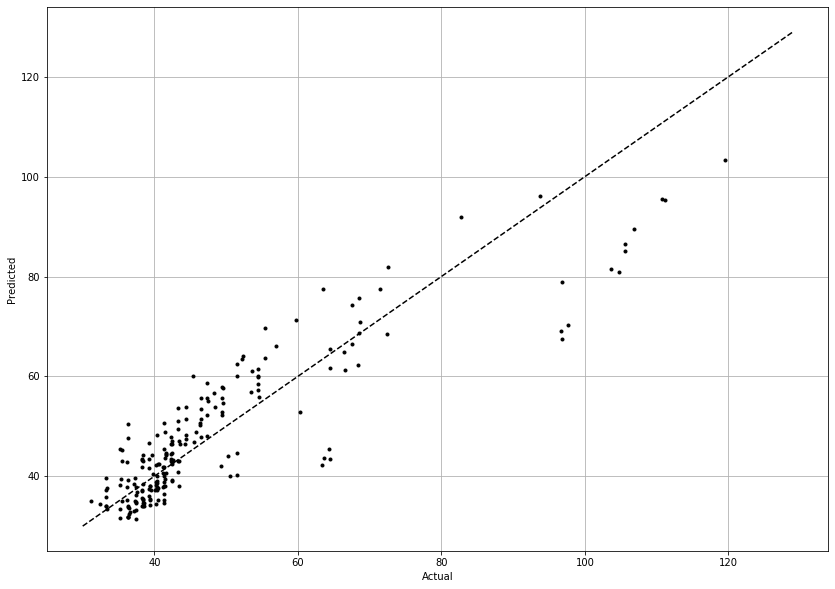

In [169]:
random_state = 42

X = data_processed[[names[1], names[2], names[3], names[4]]]
X.combiner_used = X.combiner_used.astype(int)
y = data_processed[[names[0]]]

X, X_test, y, y_test = train_test_split(X, y, 
                                                  test_size=0.2, random_state=random_state)

X_train, X_val, y_train, y_val = train_test_split(X, y, 
                                                  test_size=0.33, random_state=random_state)


sc = StandardScaler().fit(X_train)
X_train_sc = sc.transform(X_train)
X_val_sc = sc.transform(X_val)
X_test_sc = sc.transform(X_test)

# Conduct Hyper parameter search

h_max = 50
h_step = 1
h_max_temp = int(h_max/h_step)
min_error = 1000000
lamba_final = 0
h_final = h_step

for lamba in [0, 0.0000001, 0.00001, 0.001, 0.1]:
    print(lamba)
    for h in range(1, h_max_temp):
        h = h * h_step
        design_matrix_framework = add_auto_RBF(X_train_sc, h=h, n=100, type='uniform', append=False)

        X_train_RBF = generate_design_matrix(X_train_sc, design_matrix_framework)
        
        X_val_RBF = generate_design_matrix(X_val_sc, design_matrix_framework)
        X_val_RBF = np.hstack((X_val_RBF, np.ones((X_val_RBF.shape[0], 1))))

        X_train_reg, y_train_reg = regularise(X_train_RBF, y_train, lamba)
        X_train_reg = np.hstack((X_train_reg, np.ones((X_train_reg.shape[0], 1))))
        
        w = fit(X_train_reg, y_train_reg)
        y_pred = predict(X_val_RBF, w)

        error = mean_squared_error(y_val, y_pred)

        if error < min_error:
            min_error = error
            h_final = h
            lamba_final = lamba
        
print(f'Best result with h={h_final} and lambda={lamba}')

design_matrix_framework = add_auto_RBF(X_train_sc, h=h_final, n=100, type='uniform', append=False)

X_train_RBF = generate_design_matrix(X_train_sc, design_matrix_framework)
X_train_RBF = np.hstack((X_train_RBF, np.ones((X_train_RBF.shape[0], 1))))
X_val_RBF = generate_design_matrix(X_val_sc, design_matrix_framework)
X_val_RBF = np.hstack((X_val_RBF, np.ones((X_val_RBF.shape[0], 1))))

#X_train_reg, y_train_reg = regularise(X_train_RBF, y_train, lamba)
w = fit(X_train_RBF, y_train)

y_pred = predict(X_val_RBF, w)

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_val, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_val, y_pred))

figure = plt.figure(figsize=(14,10))
plt.plot(y_val, y_pred, '.k')
plt.plot(np.arange(30, 130), np.arange(30, 130), '--k')
plt.grid()
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()